In [8]:
# mount driver
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CardiacSeg/dataset/nnUNet

# install dependents
!pip install -q nnunet
!pip install -q "monai-weekly[nibabel, tqdm, einops]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

# sync python module
%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1jz_DGnICBmKWCr_JL904PDQdIEK0_EQG/CardiacSeg/dataset/nnUNet
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
!pip install -q nnunet

In [21]:
import sys
# set package path
sys.path.append("/content/drive/MyDrive/CardiacSeg")

import os
from pathlib import PurePath

from monai.transforms import (
    Compose,
    LoadImaged,
)
from nnunet.dataset_conversion.utils import generate_dataset_json 

from data_utils.nnunet_dataset import get_nnunet_data_dicts
from data_utils.segthor_dataset import get_data_dicts, convert_to_nnunet_dataset
from transforms.segthor_transform import save_transform_lbl

from data_utils.visualization import show_img_lbl

## Config

In [11]:
%env nnUNet_raw_data_base=/content/drive/MyDrive/CardiacSeg/dataset/nnUNet/nnUNet_raw_data_base
%env nnUNet_preprocessed=/content/drive/MyDrive/CardiacSeg/dataset/nnUNet/nnUNet_preprocessed
%env RESULTS_FOLDER=/content/drive/MyDrive/CardiacSeg/dataset/nnUNet/nnUNet_trained_models

env: nnUNet_raw_data_base=/content/drive/MyDrive/CardiacSeg/dataset/nnUNet/nnUNet_raw_data_base
env: nnUNet_preprocessed=/content/drive/MyDrive/CardiacSeg/dataset/nnUNet/nnUNet_preprocessed
env: RESULTS_FOLDER=/content/drive/MyDrive/CardiacSeg/dataset/nnUNet/nnUNet_trained_models


In [22]:
task_name = 'Task501_SegTHOR'
data_dir = '/content/drive/MyDrive/CardiacSeg/dataset/SegTHOR/train'
dst_data_dir = f'/content/drive/MyDrive/CardiacSeg/dataset/nnUNet/nnUNet_raw_data_base/nnUNet_raw_data/{task_name}'
data_json_pth = os.path.join(dst_data_dir, 'dataset.json')
imagesTr_pth = os.path.join(dst_data_dir, 'imagesTr')
imagesTs_pth = os.path.join(dst_data_dir, 'imagesTs')

## Convert dataset to nnunet datasest format

In [ ]:
convert_to_nnunet_dataset(
    data_dir,
    dst_data_dir,
    fold=4, 
    split_train_ratio=0.8,
    num_fold=5
)

fold: 4
train files (26): ['Patient_01', 'Patient_02', 'Patient_03', 'Patient_04', 'Patient_05', 'Patient_06', 'Patient_07', 'Patient_08', 'Patient_09', 'Patient_10', 'Patient_11', 'Patient_12', 'Patient_13', 'Patient_14', 'Patient_15', 'Patient_16', 'Patient_17', 'Patient_18', 'Patient_19', 'Patient_20', 'Patient_21', 'Patient_22', 'Patient_23', 'Patient_24', 'Patient_25', 'Patient_26']
val files (6): ['Patient_27', 'Patient_28', 'Patient_29', 'Patient_30', 'Patient_31', 'Patient_32']
test files (8): ['Patient_33', 'Patient_34', 'Patient_35', 'Patient_36', 'Patient_37', 'Patient_38', 'Patient_39', 'Patient_40']


100%|██████████| 8/8 [00:50<00:00,  6.37s/it]


## Generate data json file

In [17]:
generate_dataset_json(
    output_file=data_json_pth, 
    imagesTr_dir=imagesTr_pth,
    imagesTs_dir=imagesTs_pth,
    modalities=['CT'],
    labels={0: 'background', 1: 'heart'},
    dataset_name=task_name,
    license='see challenge website'
)
# todo mdf tensorImageSize 3D to 4D 

## Check data

In [ ]:
nn_unet_data_dicts = get_nnunet_data_dicts(dst_data_dir)

In [ ]:
data = LoadImaged(keys=['image','label'])(nn_unet_data_dicts[0])

(512, 512, 229)
(512, 512, 229)


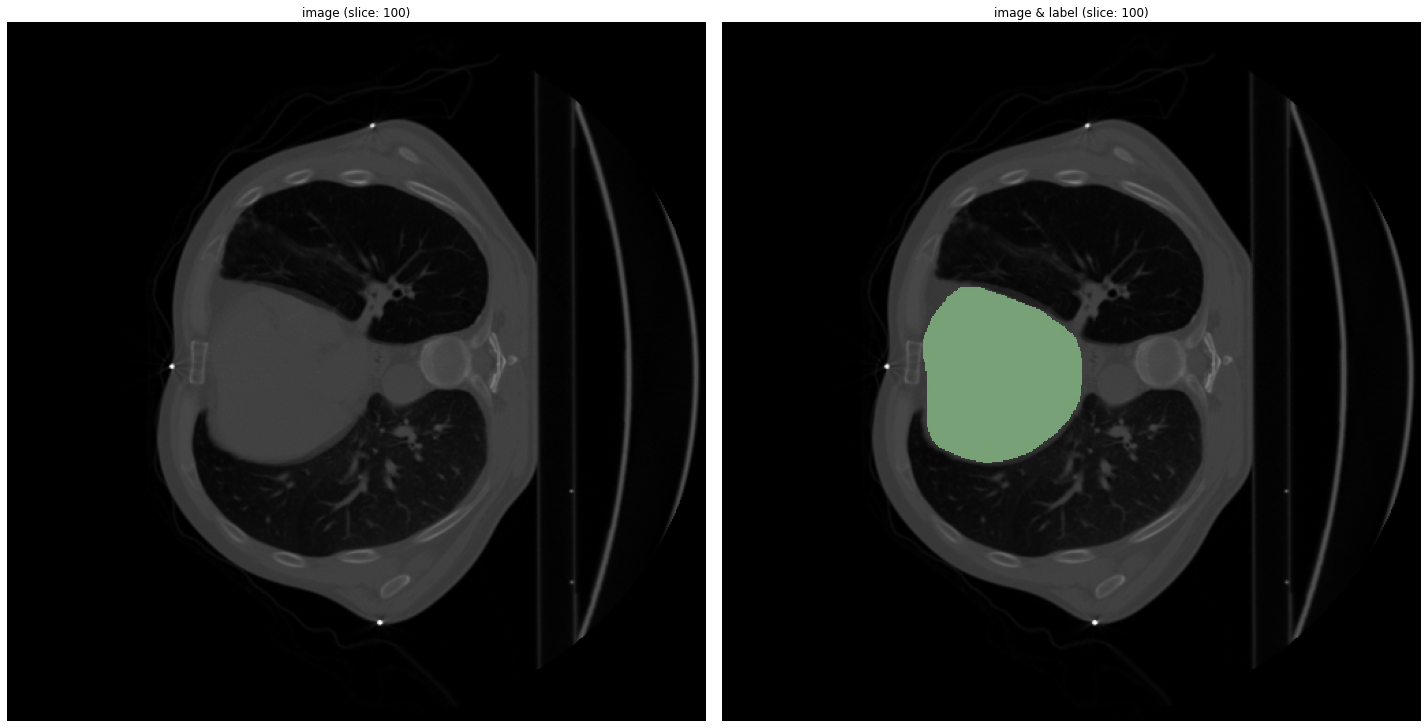

In [ ]:
print(data['image'].shape)
print(data['label'].shape)
show_img_lbl(data['image'][:,:,100], data['label'][:,:,100], slice_idx=100, num_classes=2)

## Experiment planning and preprocessing

In [ ]:
!nnUNet_plan_and_preprocess -t 501 --verify_dataset_integrity



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Verifying training set
checking case Patient_01
checking case Patient_02
checking case Patient_03
checking case Patient_04
checking case Patient_05
checking case Patient_06
checking case Patient_07
checking case Patient_08
checking case Patient_09
checking case Patient_10
checking case Patient_11
checking case Patient_12
checking case Patient_13
checking case Patient_14
checking case Patient_15
checking case Patient_16
checking case Patient_17
checking case Patient_18
checking case Patient_19
checking case Patient_20
checking case Patient_21
checking case Patient_22
checking case Patient_23
checking case Patient_24
checking case P